## 2024 - Fetch Analytics Engineer Assessment

My goal is to analyze the supplied data (JSON file format) and consolidate, by performing normalization, into a coherent and manageable database schema. I will then generate a series of SQL queries for this new schema so as to answer the supplied business questions, perform EDA and summarize important findings in a message to the business stakeholder.

In [1]:
#import relevant packages
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

### 1A) The Reciepts Data

In [2]:
#start by loading the data into pandas dataframe formats
receipts = pd.read_json('receipts.json', lines = True)
receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,{'$oid': '5ff1e1eb0a720f0523000575'},500.0,"Receipt number 2 completed, bonus point schedu...",{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687531000},{'$date': 1609687536000},{'$date': 1609687531000},500.0,{'$date': 1609632000000},5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,{'$oid': '5ff1e1bb0a720f052300056b'},150.0,"Receipt number 5 completed, bonus point schedu...",{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687483000},{'$date': 1609687488000},{'$date': 1609687483000},150.0,{'$date': 1609601083000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,{'$oid': '5ff1e1f10a720f052300057a'},5.0,All-receipts receipt bonus,{'$date': 1609687537000},{'$date': 1609687537000},NaN,{'$date': 1609687542000},NaN,5.0,{'$date': 1609632000000},1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,{'$oid': '5ff1e1ee0a7214ada100056f'},5.0,All-receipts receipt bonus,{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687534000},{'$date': 1609687539000},{'$date': 1609687534000},5.0,{'$date': 1609632000000},4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,{'$oid': '5ff1e1d20a7214ada1000561'},5.0,All-receipts receipt bonus,{'$date': 1609687506000},{'$date': 1609687506000},{'$date': 1609687511000},{'$date': 1609687511000},{'$date': 1609687506000},5.0,{'$date': 1609601106000},2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [3]:
#it is apparent that some column values (such as _id and createDate, for example) require cleaning
#extract the identifier from the dictionaries in each row
receipts['_id'] = receipts['_id'].apply(lambda x: x['$oid'])
#convert the datetime stamps from ms to a more readable format
receipts['createDate'] = pd.to_datetime(receipts['createDate'].apply(lambda x: x['$date'] if isinstance (x, dict) else np.nan), 
                                        unit = 'ms')
receipts['dateScanned'] = pd.to_datetime(receipts['dateScanned'].apply(lambda x: x['$date'] if isinstance (x, dict) else np.nan), 
                                        unit = 'ms')
receipts['finishedDate'] = pd.to_datetime(receipts['finishedDate'].apply(lambda x: x['$date'] if isinstance (x, dict) else np.nan), 
                                        unit = 'ms')
receipts['modifyDate'] = pd.to_datetime(receipts['modifyDate'].apply(lambda x: x['$date'] if isinstance (x, dict) else np.nan), 
                                        unit = 'ms')
receipts['pointsAwardedDate'] = pd.to_datetime(receipts['pointsAwardedDate'].apply(lambda x: x['$date'] if isinstance (x, dict) else np.nan), 
                                        unit = 'ms')
receipts['purchaseDate'] = pd.to_datetime(receipts['purchaseDate'].apply(lambda x: x['$date'] if isinstance (x, dict) else np.nan), 
                                        unit = 'ms')

receipts.head()

,_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptItemList,rewardsReceiptStatus,totalSpent,userId
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,"[{'needsFetchReview': False, 'partnerItemId': ...",REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,"[{'barcode': '4011', 'description': 'ITEM NOT ...",FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


It seems as though the rewardsReceiptItemList contains a nested field. Let's take a look at some of the values in this column to address how to approach dealing with them.

In [4]:
receipts['rewardsReceiptItemList'][0]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '26.00',
  'itemPrice': '26.00',
  'needsFetchReview': False,
  'partnerItemId': '1',
  'preventTargetGapPoints': True,
  'quantityPurchased': 5,
  'userFlaggedBarcode': '4011',
  'userFlaggedNewItem': True,
  'userFlaggedPrice': '26.00',
  'userFlaggedQuantity': 5}]

In [5]:
receipts['rewardsReceiptItemList'][24]

[{'barcode': '4011',
  'description': 'ITEM NOT FOUND',
  'finalPrice': '1',
  'itemPrice': '1',
  'partnerItemId': '1',
  'quantityPurchased': 1},
 {'barcode': '1234',
  'needsFetchReview': True,
  'needsFetchReviewReason': 'USER_FLAGGED',
  'partnerItemId': '2',
  'preventTargetGapPoints': True,
  'userFlaggedBarcode': '1234',
  'userFlaggedDescription': '',
  'userFlaggedNewItem': True}]

In [6]:
receipts['rewardsReceiptItemList'][99]

[{'barcode': '021000051113',
  'competitiveProduct': True,
  'finalPrice': '4.55',
  'itemPrice': '4.55',
  'partnerItemId': '1',
  'quantityPurchased': 1,
  'rewardsGroup': 'SARGENTO GRATED PARMESAN CHEESE',
  'rewardsProductPartnerId': '5e7cf838f221c312e698a628'},
 {'barcode': '021000051113',
  'competitiveProduct': True,
  'finalPrice': '4.55',
  'itemPrice': '4.55',
  'partnerItemId': '2',
  'quantityPurchased': 1,
  'rewardsGroup': 'SARGENTO GRATED PARMESAN CHEESE',
  'rewardsProductPartnerId': '5e7cf838f221c312e698a628'},
 {'barcode': '021000051113',
  'competitiveProduct': True,
  'finalPrice': '4.55',
  'itemPrice': '4.55',
  'partnerItemId': '3',
  'quantityPurchased': 1,
  'rewardsGroup': 'SARGENTO GRATED PARMESAN CHEESE',
  'rewardsProductPartnerId': '5e7cf838f221c312e698a628'},
 {'barcode': '021000051113',
  'competitiveProduct': True,
  'finalPrice': '4.55',
  'itemPrice': '4.55',
  'partnerItemId': '4',
  'quantityPurchased': 1,
  'rewardsGroup': 'SARGENTO GRATED PARMESAN

It looks like there can be multiple items per a given receipt, which makes sense intuitively. Each of them have their own fields stored in this column, the fields themselves are not necessarily the same for each item. It would make sense to store the information in this column in it's own table - a table for information on Items only.

I have to parse the data in the rewardsReceiptItemList column to retrieve all unique fields and store their corresponding values as present on each unique receipt (this is determined by the unique identifier - receipt_id).


In [7]:
#begin by validating that the _id field in the reciepts table is indeed a primary key
#all entries must be unique
print(len(receipts)==len(receipts._id.unique()))
#and all entries must be non-null
print(sum(receipts['_id'].isnull().astype('int')))

True
0


Since the receipt identifiers are indeed non-null and unique, we can go ahead and use them as a primary key for the recipts items table we will create. If we select to keep the receipts table as its own table in the final schema, then we could use it as a primary key for this table, too.

In [8]:
#now, let us begin extracting the fields from the rewardsReceiptItemList column
#start by collecting each of the unique fields in the column entries - these (and the receipt _id) will be the columns in the new df
cols = set()
cols.add('receipt_id')# here, I am calling it 'receipt_id' although it is called '_id' in the original receipts df
for row in range(receipts.shape[0]):
    #check whether the entry in a row is iterable
    try:
        iter(receipts['rewardsReceiptItemList'][row])
    except TypeError as te:
        continue
    for entry in receipts['rewardsReceiptItemList'][row]:
        for item in entry:
            cols.add(str(item))


In [9]:
#now we can create a separate dataframe to represent this new table and begin populating it
receipts_items = pd.DataFrame(columns = list(cols))
# step through the rows once again and each entry is like a mapping of the columns to data pairs in a df
for row in range(receipts.shape[0]):
    try:
        iter(receipts['rewardsReceiptItemList'][row])
    except TypeError as te:
        continue
    for entry in receipts['rewardsReceiptItemList'][row]:
        #add the corresponding receipt id to the entry
        entry['receipt_id'] = receipts['_id'][row]
        #populate the corresponding row in the new data frame with this information
        receipts_items = receipts_items.append(entry, ignore_index = True)
receipts_items.head()

,description,rewardsGroup,userFlaggedQuantity,quantityPurchased,originalReceiptItemText,receipt_id,partnerItemId,pointsEarned,metabriteCampaignId,originalMetaBriteBarcode,...,finalPrice,barcode,userFlaggedNewItem,competitorRewardsGroup,userFlaggedBarcode,needsFetchReviewReason,originalMetaBriteQuantityPurchased,originalMetaBriteItemPrice,userFlaggedDescription,itemPrice
0,ITEM NOT FOUND,NaN,5,5,NaN,5ff1e1eb0a720f0523000575,1,NaN,NaN,NaN,...,26.00,4011,True,NaN,4011,NaN,NaN,NaN,NaN,26.00
1,ITEM NOT FOUND,NaN,NaN,1,NaN,5ff1e1bb0a720f052300056b,1,NaN,NaN,NaN,...,1,4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,DORITOS SPICY SWEET CHILI SINGLE SERVE,1,1,NaN,5ff1e1bb0a720f052300056b,2,NaN,NaN,NaN,...,10.00,028400642255,True,NaN,028400642255,USER_FLAGGED,NaN,NaN,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00
3,NaN,NaN,3,NaN,NaN,5ff1e1f10a720f052300057a,1,NaN,NaN,NaN,...,NaN,NaN,True,NaN,4011,NaN,NaN,NaN,NaN,NaN
4,ITEM NOT FOUND,NaN,4,4,NaN,5ff1e1ee0a7214ada100056f,1,NaN,NaN,NaN,...,28.00,4011,True,NaN,4011,NaN,NaN,NaN,NaN,28.00


In [10]:
#okay, now that all the receipt items are consolidated in the same table, lets take a look at the data types and entries
receipts_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   description                         6560 non-null   object
 1   rewardsGroup                        1731 non-null   object
 2   userFlaggedQuantity                 299 non-null    object
 3   quantityPurchased                   6767 non-null   object
 4   originalReceiptItemText             5760 non-null   object
 5   receipt_id                          6941 non-null   object
 6   partnerItemId                       6941 non-null   object
 7   pointsEarned                        927 non-null    object
 8   metabriteCampaignId                 863 non-null    object
 9   originalMetaBriteBarcode            71 non-null     object
 10  originalMetaBriteDescription        10 non-null     object
 11  needsFetchReview                    813 non-null    obje

In [11]:
# since we created a table out of the rewardsReceiptItemList field, we can remove this column from the recipts df
receipts = receipts.drop('rewardsReceiptItemList', axis = 1)

In [12]:
# let's now check for a primary key in the receipts items table - could it be receipt_id?
print(len(receipts_items['receipt_id'])==len(receipts_items['receipt_id'].unique())) # is it unique?

False


In [13]:
print(len(receipts_items['partnerItemId'])==len(receipts_items['partnerItemId'].unique())) # is it unique?

False


It does not look as though the receipts_items table will have a primary key, just a foreign key, receipt_id, that references the _id column (the primary key) of the receipts table.

In [14]:
#for improved readability, I will rename the _id column in the receipts table to match receipt_id in the receipt_items table
receipts.rename(columns = {'_id':'receipt_id'}, inplace = True)
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   receipt_id               1119 non-null   object        
 1   bonusPointsEarned        544 non-null    float64       
 2   bonusPointsEarnedReason  544 non-null    object        
 3   createDate               1119 non-null   datetime64[ns]
 4   dateScanned              1119 non-null   datetime64[ns]
 5   finishedDate             568 non-null    datetime64[ns]
 6   modifyDate               1119 non-null   datetime64[ns]
 7   pointsAwardedDate        537 non-null    datetime64[ns]
 8   pointsEarned             609 non-null    float64       
 9   purchaseDate             671 non-null    datetime64[ns]
 10  purchasedItemCount       635 non-null    float64       
 11  rewardsReceiptStatus     1119 non-null   object        
 12  totalSpent               684 non-n

I will now make sure to update all the data types in the receipts_items table. Specifically, I will change any fields that are clearly numeric (the price fields, for example) to float64 types. Since there are no date-like fields, there is no need to convert any to a datetime type.

In [15]:
numeric_fields = ['priceAfterCoupon',
                'userFlaggedQuantity',
                'finalPrice',
                'itemPrice',
                'originalFinalPrice',
                'quantityPurchased',
                'pointsEarned',
                'targetPrice',
                'discountedItemPrice',
                'originalMetaBriteItemPrice',
                'originalMetaBriteQuantityPurchased',
                'userFlaggedPrice']

receipts_items[numeric_fields] = receipts_items[numeric_fields].apply(pd.to_numeric)
receipts_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   description                         6560 non-null   object 
 1   rewardsGroup                        1731 non-null   object 
 2   userFlaggedQuantity                 299 non-null    float64
 3   quantityPurchased                   6767 non-null   float64
 4   originalReceiptItemText             5760 non-null   object 
 5   receipt_id                          6941 non-null   object 
 6   partnerItemId                       6941 non-null   object 
 7   pointsEarned                        927 non-null    float64
 8   metabriteCampaignId                 863 non-null    object 
 9   originalMetaBriteBarcode            71 non-null     object 
 10  originalMetaBriteDescription        10 non-null     object 
 11  needsFetchReview                    813 non

### 1B) The Users Data

In [16]:
#now let us load in and examine the users data
users = pd.read_json('users.json', lines = True)
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
1,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
2,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI
3,{'$oid': '5ff1e1eacfcf6c399c274ae6'},True,{'$date': 1609687530554},{'$date': 1609687530597},consumer,Email,WI
4,{'$oid': '5ff1e194b6a9d73a3a9f1052'},True,{'$date': 1609687444800},{'$date': 1609687537858},consumer,Email,WI


In [17]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495 entries, 0 to 494
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   _id           495 non-null    object
 1   active        495 non-null    bool  
 2   createdDate   495 non-null    object
 3   lastLogin     433 non-null    object
 4   role          495 non-null    object
 5   signUpSource  447 non-null    object
 6   state         439 non-null    object
dtypes: bool(1), object(6)
memory usage: 23.8+ KB


From a first look, it seems like we have all user-related data stored in this table. I would like to start by cleaning up the identifier column, verifying whether it is a primary identifier (by eye I can see there are non-unique entries right away, so I am led to believe it is not unique at this time), and transforming the createdDate and lastLogin fields to datetime types.

In [18]:
#start by cleaning the _id and date fields as we did in the receipts table
users['_id'] = users['_id'].apply(lambda x: x['$oid'])
users['createdDate'] = pd.to_datetime(users['createdDate'].apply(lambda x: x['$date'] if isinstance(x, dict) else np.nan),
                                      unit = 'ms')
users['lastLogin'] = pd.to_datetime(users['lastLogin'].apply(lambda x: x['$date'] if isinstance(x, dict) else np.nan),
                                      unit = 'ms')
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
1,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
2,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI
3,5ff1e1eacfcf6c399c274ae6,True,2021-01-03 15:25:30.554,2021-01-03 15:25:30.596999936,consumer,Email,WI
4,5ff1e194b6a9d73a3a9f1052,True,2021-01-03 15:24:04.800,2021-01-03 15:25:37.857999872,consumer,Email,WI


In [19]:
#verify the _id field is non-unique
print(len(users['_id'])==len(users['_id'].unique()))

False


Since the user identifier column is non-unique, but is also referenced in the receipts table where it is also non-unique, we should get rid of all redundant entries so as to use the user_id field as a primary key in this table. We can do this by keeping only the most recent entry for each user_id (using the lastLogin field to do so).

In [20]:
#sort the entries by the lastLogin field, group by the _id field, and then only keep the first entry per group
users = users.sort_values(by = 'lastLogin', ascending = False)
users = users.groupby('_id', axis = 0).nth(0).reset_index()
users.head()

,_id,active,createdDate,lastLogin,role,signUpSource,state
0,54943462e4b07e684157a532,True,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204000000,fetch-staff,NaN,NaN
1,55308179e4b0eabd8f99caa2,True,2015-04-17 03:43:53.186,2018-05-07 17:23:40.003000064,consumer,NaN,WI
2,5964eb07e4b03efd0c0f267b,True,2017-07-11 15:13:11.771,2021-03-04 19:07:49.769999872,fetch-staff,NaN,IL
3,59c124bae4b0299e55b0f330,True,2017-09-19 14:07:54.302,2021-02-08 16:42:58.116999936,fetch-staff,NaN,WI
4,5a43c08fe4b014fd6b6a0612,True,2017-12-27 15:47:27.059,2021-02-12 16:22:37.155000064,consumer,NaN,NaN


In [21]:
#verify that worked as we expected by checking the user _id field
print(len(users['_id'])==len(users['_id'].unique()))

True


### 1C) The Brands Data

In [22]:
#finally, let us load in and examine the brands data
brands = pd.read_json('brands.json', lines = True)
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,{'$oid': '601ac115be37ce2ead437551'},511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,{'$oid': '601c5460be37ce2ead43755f'},511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,{'$oid': '601ac142be37ce2ead43755d'},511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,{'$oid': '601ac142be37ce2ead43755a'},511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,{'$oid': '601ac142be37ce2ead43755e'},511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [23]:
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   cpg           1167 non-null   object 
 5   name          1167 non-null   object 
 6   topBrand      555 non-null    float64
 7   brandCode     933 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


Right away I see that the _id column needs to be cleaned in a similar fashion to the way it was for the receipts and users tables. As well, the cpg column looks to be a nested field- I will have to look into this further.

In [24]:
#clean up the brands _id field
brands['_id'] = brands['_id'].apply(lambda x: x['$oid'])
brands.head()

,_id,barcode,category,categoryCode,cpg,name,topBrand,brandCode
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,"{'$id': {'$oid': '601ac114be37ce2ead437550'}, ...",test brand @1612366101024,0.0,NaN
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,"{'$id': {'$oid': '5332f5fbe4b03c9a25efd0ba'}, ...",Starbucks,0.0,STARBUCKS
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,"{'$id': {'$oid': '601ac142be37ce2ead437559'}, ...",test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,"{'$id': {'$oid': '5332fa12e4b03c9a25efd1e7'}, ...",test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827


In [25]:
#now take a look into the cpg field
brands['cpg'][0], brands['cpg'][40]

({'$id': {'$oid': '601ac114be37ce2ead437550'}, '$ref': 'Cogs'},
 {'$ref': 'Cogs', '$id': {'$oid': '550b2565e4b001d5e9e4146f'}})

Let's transform this cpg column into its own table. It looks like this table will have an identifier column (potentially a primary key) and a second field 'ref'.

In [26]:
#looks like the only two columns will be '_id' and 'ref'
cols = ['$id', '$ref']

In [27]:
brands['cpg'][0]

{'$id': {'$oid': '601ac114be37ce2ead437550'}, '$ref': 'Cogs'}

In [28]:
#now we can create a separate dataframe to represent this new table and begin populating it
cpg = pd.DataFrame(columns = list(cols))
# step through the rows once again and each entry is like a mapping of the columns to data pairs in a df
for row in range(brands.shape[0]):
    try:
        iter(brands['cpg'][row])
    except TypeError as te:
        continue
    entry = brands['cpg'][row]
    # for entry in brands['cpg'][row]:
    #     print(entry, row)
    #     #populate the corresponding row in the new data frame with this information
    cpg = cpg.append(entry, ignore_index = True)
cpg.head()

,$id,$ref
0,{'$oid': '601ac114be37ce2ead437550'},Cogs
1,{'$oid': '5332f5fbe4b03c9a25efd0ba'},Cogs
2,{'$oid': '601ac142be37ce2ead437559'},Cogs
3,{'$oid': '601ac142be37ce2ead437559'},Cogs
4,{'$oid': '5332fa12e4b03c9a25efd1e7'},Cogs


To cleann up the cpg table, let's fix the column names as well as extract the identifier values in the $id column.

In [29]:
cpg = cpg.rename(columns = {'$id':'id', '$ref':'ref'})
cpg['id'] = cpg['id'].apply(lambda x: x['$oid'])
cpg.head()

,id,ref
0,601ac114be37ce2ead437550,Cogs
1,5332f5fbe4b03c9a25efd0ba,Cogs
2,601ac142be37ce2ead437559,Cogs
3,601ac142be37ce2ead437559,Cogs
4,5332fa12e4b03c9a25efd1e7,Cogs


In [30]:
#what are the factors of the ref column?
cpg.ref.value_counts()

Cogs    1020
Cpgs     147
Name: ref, dtype: int64

In [31]:
#let's check the brands identifier for uniqueness and non-null values
print(len(brands['_id'])==len(brands['_id'].unique()))
print(sum(brands['_id'].isnull().astype('int')))

True
0


In [32]:
#let's do the same for the cpg identifier
print(len(cpg['id'])==len(cpg['id'].unique()))
print(sum(cpg['id'].isnull().astype('int')))

False
0


In [33]:
#okay so the brand identifier is the primary key in the brands table, and the cpg identifier is non-null but not unique
#let's use the brand identifier as a primary key in the cpg table as well
cpg['brand_id'] = brands['_id']
cpg.head(2)

,id,ref,brand_id
0,601ac114be37ce2ead437550,Cogs,601ac115be37ce2ead437551
1,5332f5fbe4b03c9a25efd0ba,Cogs,601c5460be37ce2ead43755f


In [34]:
#now that we have moved the cpg field to its own column, let's update the brands table
#we should just keep the cpg id field in the brands table as a foreign reference to the cpg table
brands['cpg_id'] = cpg['id']
brands.drop('cpg', axis = 1, inplace = True)

Now that we have four tables which should each have a primary key, let's take one last look at them and put together a diagram that illustrates the relationships between them. Also, make sure to rename the _id columns appropriately to improve readability.

In [35]:
brands = brands.rename(columns = {'_id':'brand_id'})
brands.head()

,brand_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg_id
0,601ac115be37ce2ead437551,511111019862,Baking,BAKING,test brand @1612366101024,0.0,NaN,601ac114be37ce2ead437550
1,601c5460be37ce2ead43755f,511111519928,Beverages,BEVERAGES,Starbucks,0.0,STARBUCKS,5332f5fbe4b03c9a25efd0ba
2,601ac142be37ce2ead43755d,511111819905,Baking,BAKING,test brand @1612366146176,0.0,TEST BRANDCODE @1612366146176,601ac142be37ce2ead437559
3,601ac142be37ce2ead43755a,511111519874,Baking,BAKING,test brand @1612366146051,0.0,TEST BRANDCODE @1612366146051,601ac142be37ce2ead437559
4,601ac142be37ce2ead43755e,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,0.0,TEST BRANDCODE @1612366146827,5332fa12e4b03c9a25efd1e7


In [36]:
users = users.rename(columns = {'_id':'user_id'})
users.head()

,user_id,active,createdDate,lastLogin,role,signUpSource,state
0,54943462e4b07e684157a532,True,2014-12-19 14:21:22.381,2021-03-05 16:52:23.204000000,fetch-staff,NaN,NaN
1,55308179e4b0eabd8f99caa2,True,2015-04-17 03:43:53.186,2018-05-07 17:23:40.003000064,consumer,NaN,WI
2,5964eb07e4b03efd0c0f267b,True,2017-07-11 15:13:11.771,2021-03-04 19:07:49.769999872,fetch-staff,NaN,IL
3,59c124bae4b0299e55b0f330,True,2017-09-19 14:07:54.302,2021-02-08 16:42:58.116999936,fetch-staff,NaN,WI
4,5a43c08fe4b014fd6b6a0612,True,2017-12-27 15:47:27.059,2021-02-12 16:22:37.155000064,consumer,NaN,NaN


In [37]:
receipts = receipts.rename(columns = {'userId':'user_id'})
receipts.head()

,receipt_id,bonusPointsEarned,bonusPointsEarnedReason,createDate,dateScanned,finishedDate,modifyDate,pointsAwardedDate,pointsEarned,purchaseDate,purchasedItemCount,rewardsReceiptStatus,totalSpent,user_id
0,5ff1e1eb0a720f0523000575,500.0,"Receipt number 2 completed, bonus point schedu...",2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,500.0,2021-01-03 00:00:00,5.0,FINISHED,26.0,5ff1e1eacfcf6c399c274ae6
1,5ff1e1bb0a720f052300056b,150.0,"Receipt number 5 completed, bonus point schedu...",2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,150.0,2021-01-02 15:24:43,2.0,FINISHED,11.0,5ff1e194b6a9d73a3a9f1052
2,5ff1e1f10a720f052300057a,5.0,All-receipts receipt bonus,2021-01-03 15:25:37,2021-01-03 15:25:37,NaT,2021-01-03 15:25:42,NaT,5.0,2021-01-03 00:00:00,1.0,REJECTED,10.0,5ff1e1f1cfcf6c399c274b0b
3,5ff1e1ee0a7214ada100056f,5.0,All-receipts receipt bonus,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,5.0,2021-01-03 00:00:00,4.0,FINISHED,28.0,5ff1e1eacfcf6c399c274ae6
4,5ff1e1d20a7214ada1000561,5.0,All-receipts receipt bonus,2021-01-03 15:25:06,2021-01-03 15:25:06,2021-01-03 15:25:11,2021-01-03 15:25:11,2021-01-03 15:25:06,5.0,2021-01-02 15:25:06,2.0,FINISHED,1.0,5ff1e194b6a9d73a3a9f1052


In [38]:
receipts_items.head()

,description,rewardsGroup,userFlaggedQuantity,quantityPurchased,originalReceiptItemText,receipt_id,partnerItemId,pointsEarned,metabriteCampaignId,originalMetaBriteBarcode,...,finalPrice,barcode,userFlaggedNewItem,competitorRewardsGroup,userFlaggedBarcode,needsFetchReviewReason,originalMetaBriteQuantityPurchased,originalMetaBriteItemPrice,userFlaggedDescription,itemPrice
0,ITEM NOT FOUND,NaN,5.0,5.0,NaN,5ff1e1eb0a720f0523000575,1,NaN,NaN,NaN,...,26.0,4011,True,NaN,4011,NaN,NaN,NaN,NaN,26.0
1,ITEM NOT FOUND,NaN,NaN,1.0,NaN,5ff1e1bb0a720f052300056b,1,NaN,NaN,NaN,...,1.0,4011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,DORITOS SPICY SWEET CHILI SINGLE SERVE,1.0,1.0,NaN,5ff1e1bb0a720f052300056b,2,NaN,NaN,NaN,...,10.0,028400642255,True,NaN,028400642255,USER_FLAGGED,NaN,NaN,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.0
3,NaN,NaN,3.0,NaN,NaN,5ff1e1f10a720f052300057a,1,NaN,NaN,NaN,...,NaN,NaN,True,NaN,4011,NaN,NaN,NaN,NaN,NaN
4,ITEM NOT FOUND,NaN,4.0,4.0,NaN,5ff1e1ee0a7214ada100056f,1,NaN,NaN,NaN,...,28.0,4011,True,NaN,4011,NaN,NaN,NaN,NaN,28.0


In [39]:
cpg = cpg.rename(columns = {"id":"cpg_id"})
cpg.head()

,cpg_id,ref,brand_id
0,601ac114be37ce2ead437550,Cogs,601ac115be37ce2ead437551
1,5332f5fbe4b03c9a25efd0ba,Cogs,601c5460be37ce2ead43755f
2,601ac142be37ce2ead437559,Cogs,601ac142be37ce2ead43755d
3,601ac142be37ce2ead437559,Cogs,601ac142be37ce2ead43755a
4,5332fa12e4b03c9a25efd1e7,Cogs,601ac142be37ce2ead43755e


It seems the final element to investigate, now, is how the brands table and the receipts_items table are related. The feature barcode seems like it might possibly be able to serve as a primary or foreign key in the receipts table.

In [40]:
#first, verify barcode is unique in neither brands or receipts_items tables
print(len(receipts_items['barcode'])==len(receipts_items['barcode'].unique()))
print(len(brands['barcode']) == len(brands['barcode'].unique()))

False
False


In [41]:
#are the barcodes in the brands table the same barcodes as in the receipts_items table?
barcodes_brands = set()
for barcode in brands['barcode']:
    barcodes_brands.add(str(barcode))
    
barcodes_items = set()
for barcode in receipts_items['barcode']:
    barcodes_items.add(str(barcode))
    
print(barcodes_brands==barcodes_items)

False


It seems that the brands table will not have a foreign key to the receipts_items table, but could be related to the receipts_items table through the barcodes field.

### Entity Relationships:

Please see file name "ER_Diagram_Fetch.jpg" in the repository for a copy of the ER diagram for the data in this exercise. The tables are related in the following way:

- The receipts table has primary key 'receipt_id' for each receipt generated, which has a one-to-many relationship to the foreign key by the same name in the receipts_items table. The receipts table also has a foreign key 'user_id' that references the primary key 'user_id' in the users table. This relationship is many-to-one.

- The receipts_items table has the foreign key 'receipt_id' which references 'receipt_id' in the receipts table. The field 'barcode' in the receipts_items table is related to the field 'barcode' in the brands table with a many-to-many relationship.

- The brands table has a primary key 'brand_id' that is referenced by the foreign key 'brand_id' in the cpg table. The brands table also has a foreign key 'cpg_id' that references the primary key of the same name in the cpg table.

(-0.5, 1994.5, 2499.5, -0.5)

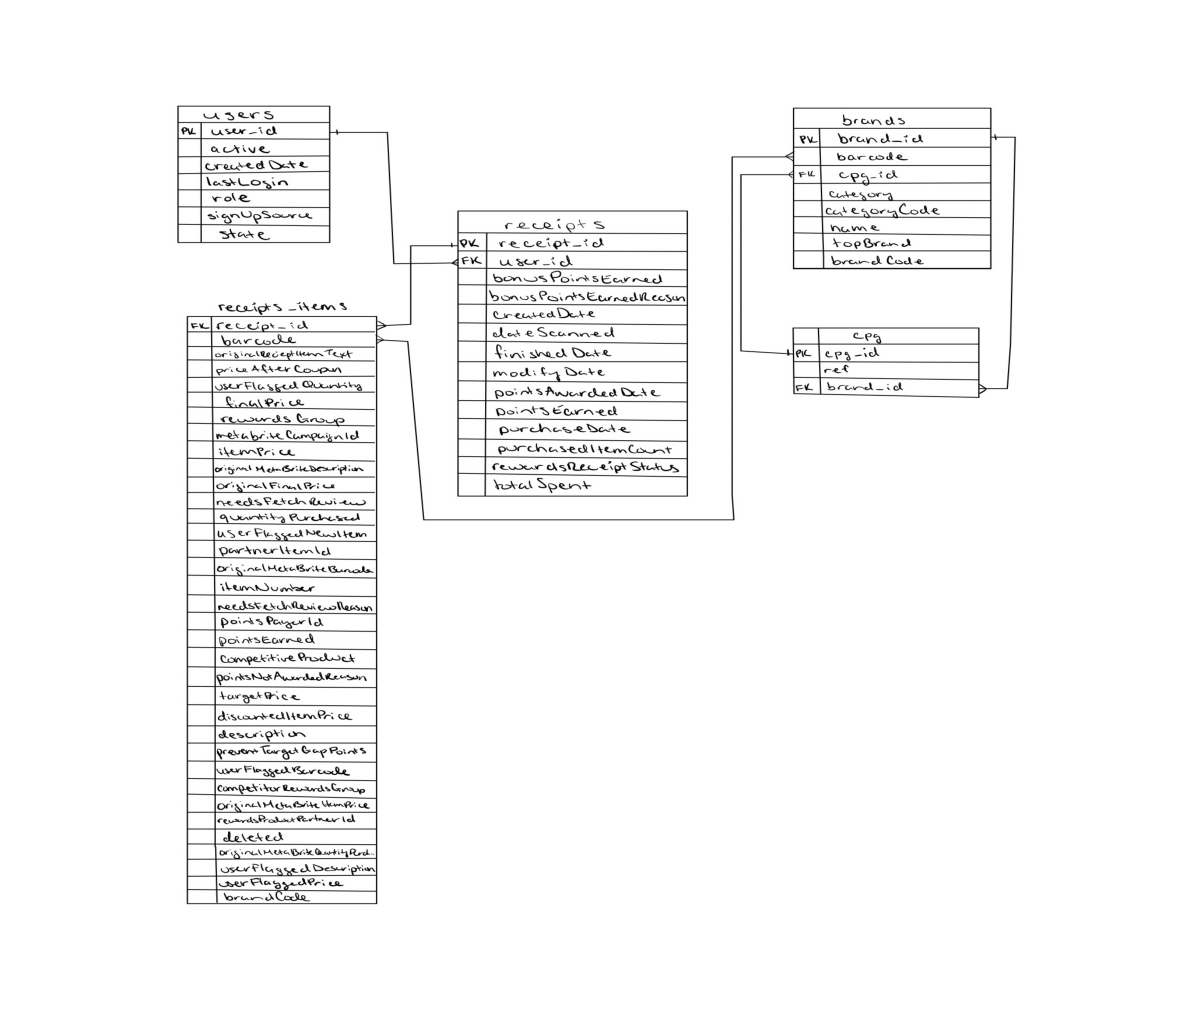

In [42]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig, ax = plt.subplots(figsize=(15, 13))
ax.imshow(mpimg.imread('ER_Diagram_Fetch.jpg'), aspect = 'auto')
ax.axis("off")

## 2 SQL Queries for Business Questions

Let us use the pandasql package to query against these tables we have structured as pandas dataframes. 

I will start by answering the third and fourth questions:

- When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?
- When considering total number of items purchased from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [43]:
pip install pandasql

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [44]:
from pandasql import sqldf

In [45]:
receipts.rewardsReceiptStatus.value_counts()

FINISHED     518
SUBMITTED    434
REJECTED      71
PENDING       50
FLAGGED       46
Name: rewardsReceiptStatus, dtype: int64

NOTE: It seems the corresponding factor to 'Accepted' would be 'FINISHED'.

In [46]:
#to answer these questions, we need only aggregate records from the receipts table
sqldf('''WITH accepted AS (
SELECT AVG(totalSpent) avg_spend,
SUM(purchasedItemCount) total_items,
1 AS accepted_bool
FROM receipts WHERE rewardsReceiptStatus = 'FINISHED'
),
rejected AS(
SELECT AVG(totalSpent) avg_spend,
SUM(purchasedItemCount) total_items,
0 AS accepted_bool
FROM receipts WHERE rewardsReceiptStatus = 'REJECTED'
)
SELECT * FROM accepted union SELECT * FROM rejected
''')

,avg_spend,total_items,accepted_bool
0,23.326056,173.0,0
1,80.854305,8184.0,1


We can see from the result of this query that the receipts whose rewardReceiptStatus is "Accepted" have a much higher average spend and count of total items purchased than those whose rewardReceiptStatus is "Rejected".

## 3) Identify Data Quality Issues

In [47]:
#starting with the receipts table
receipts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1119 entries, 0 to 1118
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   receipt_id               1119 non-null   object        
 1   bonusPointsEarned        544 non-null    float64       
 2   bonusPointsEarnedReason  544 non-null    object        
 3   createDate               1119 non-null   datetime64[ns]
 4   dateScanned              1119 non-null   datetime64[ns]
 5   finishedDate             568 non-null    datetime64[ns]
 6   modifyDate               1119 non-null   datetime64[ns]
 7   pointsAwardedDate        537 non-null    datetime64[ns]
 8   pointsEarned             609 non-null    float64       
 9   purchaseDate             671 non-null    datetime64[ns]
 10  purchasedItemCount       635 non-null    float64       
 11  rewardsReceiptStatus     1119 non-null   object        
 12  totalSpent               684 non-n

It seems there are many null entries in the receipts table - why would that be when there is a user identified for each of the receipts?

In [50]:
#let's take a look at the receipts with null values in pointsAwardedDate
receipts.loc[receipts.pointsAwardedDate.isnull()].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 582 entries, 2 to 1118
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   receipt_id               582 non-null    object        
 1   bonusPointsEarned        65 non-null     float64       
 2   bonusPointsEarnedReason  65 non-null     object        
 3   createDate               582 non-null    datetime64[ns]
 4   dateScanned              582 non-null    datetime64[ns]
 5   finishedDate             54 non-null     datetime64[ns]
 6   modifyDate               582 non-null    datetime64[ns]
 7   pointsAwardedDate        0 non-null      datetime64[ns]
 8   pointsEarned             72 non-null     float64       
 9   purchaseDate             134 non-null    datetime64[ns]
 10  purchasedItemCount       98 non-null     float64       
 11  rewardsReceiptStatus     582 non-null    object        
 12  totalSpent               147 non-nu

It seems as though the missing data might be attributed to the cases where the transaction at hand either does not involve the earning/awarding of points (only a few of these records actually have points earned) or the finishedDate field is also null. I wonder whether the finishedDate field implies an error with connecting/communitating with the database that houses each user's points balance and a null finishedDate field means this communication was unsuccessful? If so, that would explain why so many of the pointsAwardedDate fields are null.

- It does not seem odd that the fields relating to earning bonus points are largely null as these are typically uncommon events.

- It also does not seem off that the purchaseDate and totalSpent fields have many null entries - a transaction does not necessarily have to constitute a purchase (a return, or points balance inquiry, for example are other possible transaction types).

<AxesSubplot: xlabel='pointsEarned', ylabel='Density'>

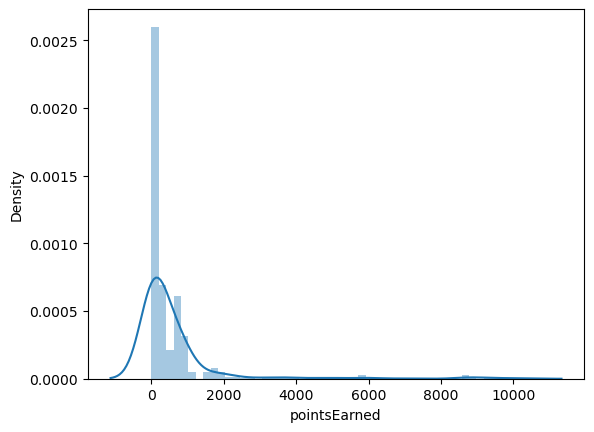

In [66]:
# let's take a peek at the distribution of pointsEarned
import seaborn as sns
sns.distplot(receipts.pointsEarned)

(0.0, 0.0001)

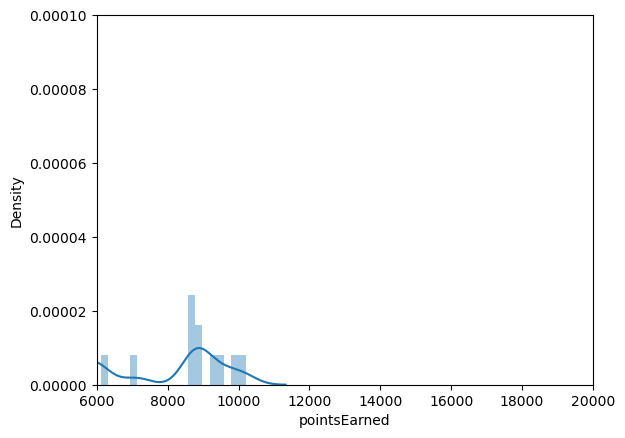

In [75]:
#zoom in on the right hand tail of the distribution
sns.distplot(receipts.pointsEarned)
plt.xlim([6000,20000])
plt.ylim([0,0.0001])

This distribution checks out, we would expect there to be less people earning tonnes of points per transaction than those earning a smaller amount. This could be attributed to sale or other promotional events condusive to bulk-buying or a larger volume of points earned.

<AxesSubplot: xlabel='bonusPointsEarned', ylabel='Density'>

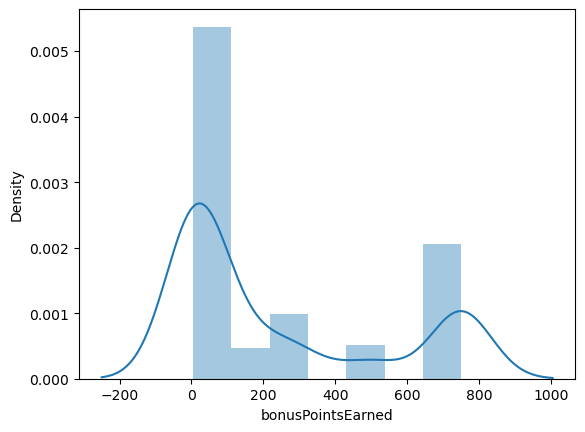

In [77]:
#what about the distribution for earning bonus points?
sns.distplot(receipts.bonusPointsEarned)


In [79]:
#seems to almost take on a bimodal distribution... what are the reasons for earning bonus points?
receipts.bonusPointsEarnedReason.value_counts()

All-receipts receipt bonus                                                             183
Receipt number 1 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)    119
COMPLETE_NONPARTNER_RECEIPT                                                             71
COMPLETE_PARTNER_RECEIPT                                                                39
Receipt number 3 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     31
Receipt number 2 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     30
Receipt number 5 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     27
Receipt number 4 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     26
Receipt number 6 completed, bonus point schedule DEFAULT (5cefdcacf3693e0b50e83a36)     18
Name: bonusPointsEarnedReason, dtype: int64

 - The bonus points seem to take on a bimodal distribution, but the reasons for this are not clear as the reasons for earning bonus points aare not very explanatory.

In [51]:
#now looking at the reciepts_items table
receipts_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6941 entries, 0 to 6940
Data columns (total 35 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   description                         6560 non-null   object 
 1   rewardsGroup                        1731 non-null   object 
 2   userFlaggedQuantity                 299 non-null    float64
 3   quantityPurchased                   6767 non-null   float64
 4   originalReceiptItemText             5760 non-null   object 
 5   receipt_id                          6941 non-null   object 
 6   partnerItemId                       6941 non-null   object 
 7   pointsEarned                        927 non-null    float64
 8   metabriteCampaignId                 863 non-null    object 
 9   originalMetaBriteBarcode            71 non-null     object 
 10  originalMetaBriteDescription        10 non-null     object 
 11  needsFetchReview                    813 non

A large data quality issue lies here in the reciepts_items table and the fact that there is no primary key. Therefore there is a high level of data redundancy in this table alone. If each item in the store/catalog had some kind of unique identifier, this data could be normalized such that each item and its relevant fields could be stored in a separate table, with a relationship to other receipt-related fields using the barcode or receipt_id foreign keys.

   - This table includes both information related to receipts and individual items which leads to confusion regarding the content of the table, redundancy in entries, and poor accessibility/readability.

In [80]:
#what are some possible reasons points may not be awarded to customers?
receipts_items.pointsNotAwardedReason.value_counts()

Action not allowed for user and CPG    340
Name: pointsNotAwardedReason, dtype: int64

- Hmm, there is only one reason and who might this be applied to?

In [53]:
#let's look at the users table
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       212 non-null    object        
 1   active        212 non-null    bool          
 2   createdDate   212 non-null    datetime64[ns]
 3   lastLogin     172 non-null    datetime64[ns]
 4   role          212 non-null    object        
 5   signUpSource  207 non-null    object        
 6   state         206 non-null    object        
dtypes: bool(1), datetime64[ns](2), object(4)
memory usage: 10.3+ KB


In [89]:
#what is the distribution of created dates?
#first, group into YYYY-MM format and then count the users in each group
users['yymm'] = users['createdDate'].dt.strftime('%Y-%m')
users_grouped = users.groupby('yymm').sum().reset_index()
users_grouped

,yymm,active
0,2014-12,1
1,2015-04,1
2,2017-07,1
3,2017-09,1
4,2017-12,1
5,2020-01,1
6,2020-07,1
7,2020-11,4
8,2020-12,1
9,2021-01,169


Overall, the users table does not seem to have an unreasonable amount of data missing, is very easy to interpret, and is normalized with user_id as the primary key. This table has relatively good data quality.

Something to note, however, is a huge spike in the number of users with accounts created in January of 2021 (169), followed by February of 2021 (30) with all the rest of the months only 1 or 4 total users. Either there was an issue with how the accounts were created/tracked up until 2021 or they really just gained in popularity starting in 2021.

In [56]:
#let's look at the brands table
brands.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand_id      1167 non-null   object 
 1   barcode       1167 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   name          1167 non-null   object 
 5   topBrand      555 non-null    float64
 6   brandCode     933 non-null    object 
 7   cpg_id        1167 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 73.1+ KB


In [57]:
#what are the cases where the category field is null?
brands.loc[brands.category.isnull()]


,brand_id,barcode,category,categoryCode,name,topBrand,brandCode,cpg_id
11,57c08106e4b0718ff5fcb02c,511111102540,NaN,NaN,MorningStar,NaN,NaN,5332f5f2e4b03c9a25efd0aa
23,5332f5fee4b03c9a25efd0bd,511111303947,NaN,NaN,Bottled Starbucks,NaN,NaN,53e10d6368abd3c7065097cc
24,5332fa7ce4b03c9a25efd22e,511111802914,NaN,NaN,Full Throttle,NaN,NaN,5332f5ebe4b03c9a25efd0a8
34,5332f772e4b03c9a25efd125,511111103653,NaN,NaN,Gold Medal,NaN,NaN,5332f5f3e4b03c9a25efd0ae
43,5332f765e4b03c9a25efd11f,511111503699,NaN,NaN,Glaceau vitaminwater,NaN,NaN,5332f5ebe4b03c9a25efd0a8
...,...,...,...,...,...,...,...,...
1123,5332f7a8e4b03c9a25efd135,511111403562,NaN,NaN,Bud Light,NaN,NaN,5332f7a7e4b03c9a25efd134
1135,5d658fca6d5f3b23d1bc7912,511111405184,NaN,NaN,Do It Yourself,NaN,NaN,53e10d6368abd3c7065097cc
1144,57c08242e4b0718ff5fcb032,511111202516,NaN,NaN,Corona,NaN,NaN,5332f7a7e4b03c9a25efd134
1146,5332fa12e4b03c9a25efd1e6,511111703105,NaN,NaN,Bellatoria,NaN,NaN,5332fa12e4b03c9a25efd1e7


In [59]:
#from a first-look, these entries seem to be beverages, with the categoryCode, topBrand, and brandCode fields also null
# where does that leave the other records?
brands.loc[~brands.category.isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1012 entries, 0 to 1166
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   brand_id      1012 non-null   object 
 1   barcode       1012 non-null   int64  
 2   category      1012 non-null   object 
 3   categoryCode  517 non-null    object 
 4   name          1012 non-null   object 
 5   topBrand      553 non-null    float64
 6   brandCode     929 non-null    object 
 7   cpg_id        1012 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 71.2+ KB


In [91]:
brands.categoryCode.value_counts()

BAKING                           359
CANDY_AND_SWEETS                  71
BEER_WINE_SPIRITS                 31
HEALTHY_AND_WELLNESS              14
GROCERY                           11
BABY                               7
CLEANING_AND_HOME_IMPROVEMENT      6
BREAD_AND_BAKERY                   5
DAIRY_AND_REFRIGERATED             5
PERSONAL_CARE                      4
BEVERAGES                          1
OUTDOOR                            1
MAGAZINES                          1
FROZEN                             1
Name: categoryCode, dtype: int64

In [92]:
brands.topBrand.value_counts()

0.0    524
1.0     31
Name: topBrand, dtype: int64

In [93]:
brands.brandCode.value_counts()

                                         35
HUGGIES                                   2
GOODNITES                                 2
MALIBU® STRAWBERRY                        1
TEST BRANDCODE @1597527951412             1
                                         ..
TEST BRANDCODE @1597350074404             1
SEDAL                                     1
RED ROCK DELI                             1
ALKA SELTZER PLUS SINUS CAP/ GEL/ TAB     1
TEST BRANDCODE @1607636369405             1
Name: brandCode, Length: 897, dtype: int64

 - the entries where category is non-null still leave quite a few null entries in the other fields such as topBrand, brandCode and categoryCode. These are not-very extensive fields, lead to alot of ambiguity in the category information for each item.

In [60]:
#let's look at the cpg field
cpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1167 entries, 0 to 1166
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   cpg_id    1167 non-null   object
 1   ref       1167 non-null   object
 2   brand_id  1167 non-null   object
dtypes: object(3)
memory usage: 27.5+ KB


In [64]:
cpg.ref.value_counts()

Cogs    1020
Cpgs     147
Name: ref, dtype: int64

In [65]:
cpg.brand_id.value_counts()

6026d757be37ce6369301468    1
601ac115be37ce2ead437551    1
601c5460be37ce2ead43755f    1
601ac142be37ce2ead43755d    1
601ac142be37ce2ead43755a    1
                           ..
5fb28549be37ce522e165cb5    1
592486bfe410d61fcea3d139    1
5c4699f387ff3577e203ea29    1
5da6071ea60b87376833e34d    1
57ebc011e4b0ac389136a335    1
Name: brand_id, Length: 1167, dtype: int64

 - This table has no missing data, which is great. I wonder, however, what is the difference between the factors 'Cogs' and 'Cpgs'? If the 'p' in 'Cpgs' is just a typo, then both factors are the same and the only useful information in this table would be the brand_id.

## 4) Communicate With Stakeholders

Hello, 

My name is Sofia and I have taken a look into the receipts, brands, and users data files you have provided. Some questions I had about the data include the following:
- What is the interpretation of the finishedDate? What about a transaction would trigger this date to not be recorded for a given receipt?
- What are the possible reasons for earning bonus points? The reasons given in the dataset were difficult to extract meaning from, clarifying them would help to explain an interesting behaviour I noticed in how bonus points are awarded.
- Was there a change to the process of signing up customers to the rewards program beginning in January 2021? Was there a change to the rewards program at all that began at this time?
- What exactly is the difference between the entries 'Cogs' and 'Cpgs' in the nested field 'cpg' in the brands dataset? 

Overall, the data was interpretable, but could benefit from some organization or cleaning pre-processing that will help with overall readability. 

The largest data quality issue was a large proportion of missing data in each of the three datasets provided.  In order to resolve this, I would need to know what would trigger a field in any of the datasets to be missing/not-recorded. This information would allow me to either disregard the entries with null values or decide on how to fill them in most appropriately.

The nested field 'rewardReceiptItemList' in the receipts dataset also gave rise to a large data quality issue. This field has not only a large amount of missing data, but also a high level of redundancy. This field lacks a unique identifier or clear relationship to the rest of the information in any of the tables, which hinders potential usability/interpretability. To resolve this, I would request some context for the kinds of 'items' stored in this dataset and the processes that trigger their storage there. Feature definitions would be most helpful.

To identify data quality issues I inspected each of the datasets and tried to break them up into smaller sub-datasets for further investigation. I began by examining the kind of data stored in each sub-set, as well as how much of that data was missing. If any categorical features stood out to me, I would investigate the values these features took on and their respective counnts. I also investigated dustributions of what seemed to me to be key numerical features, such as the bonus points awarded in a transaction, the regular points awarded in a given transaction, and the distibution of dates customers joined the rewards programs.

To opitmize the creation of these datasets, a thorough understanding of the rewards program and the pipeline which is responsible for generating/collecting these records would be most useful. With this information, I might be able to better separate the data into groups which are easier to interpret and locate information. It would also allow me to identify potentially un-helpful featurse alongside features which are most important.

The largest concern I have currently is the issue of redundancy that the nested fields in the receipts table present. As the company continues to scale and collect more data, any issues present will multiply with scaling and become increasingly difficult to remedy. I reccommend an immediate re-construction of the data warehousing scheme according to my proposed model.

Thank you very much.